<a href="https://colab.research.google.com/github/othoni-hub/ECG1/blob/main/graphe_graphe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG1** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>


# **Ch4 - Notebook : Graphes, réseaux sociaux**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**


![]()
<img src="http://www-igm.univ-mlv.fr/~dr/XPOSE2012/visualisation_de_graphes/images/graphe.png" width="350" height="220"/>

# **B-A-BA du modile GraphViz dans un NoteBook**

In [1]:
#!pip install graphviz

In [2]:
from graphviz import Digraph, Source
# Create Digraph object
dot = Digraph( engine='circo')
    # engine = 'circo' ou 'neato' ou  'dot' ou 'sfdp'   
    # size taile en cm
    

In [3]:
# Add nodes A, B et C
dot.attr('node', color = "gray", shape='ellipse') # shape = polygon, box, ellipse, triangle, circle, trapezium, pentagon, hexagon, doublecircle, none
dot.node('A',"Alice")             # Noeud + étiquette
dot.node('B',"Bob")
dot.node('C',"Charlie")

In [4]:
# Add edge between A and B
dot.attr('edge', color = "blue")
dot.edges(['AB','AC', "CA"])              # au pluriel : liste des arêtes, sans étiquette
dot.edge('B','C', label = 'frère')  # au singulier : nouvelle arête avec étiquette

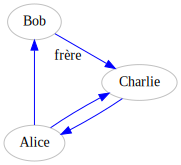

In [5]:
# Visualize the graph
dot

Conversion en Python d'un graphe donné au format "dot" de GraphViz

In [6]:
graphe_dot = '''\
digraph exemple{
    A[label="Alice"]
    B[label="Bob"]
    C[label="Charlie"]
    A->B
    B->A
    B->C 
    B->D
    D->C [label="dog"]
    C->A
    }
'''                                     # le graphe est défini au format dot
print (graphe_dot)
gr = Source(graphe_dot, engine='sfdp') # conversion du graphe en objet Python GraphViz


digraph exemple{
    A[label="Alice"]
    B[label="Bob"]
    C[label="Charlie"]
    A->B
    B->A
    B->C 
    B->D
    D->C [label="dog"]
    C->A
    }



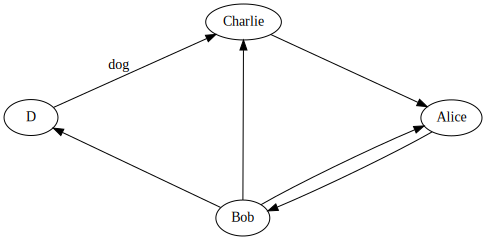

In [7]:
gr

### **Graphe à partir de sa matrice d'adjacence**

In [10]:
import numpy as np

In [11]:
# Fonction de création d'un graphe GraphViz à partir de sa matrice d'adjacence
def matrice2graphe(M,sommets, labels) :
    '''Cette fonction reçoit une matrice d'adjacence "M", la liste des sommets : "sommets" et leurs labels : "labels", 
    et retourne le graphe graphe_M correspondant'''

    # Instanciation du graphe
    graphe_M = Digraph(engine= 'circo')

    #attributs du graphe
    graphe_M.attr('node', color = "gray", shape='ellipse')
    graphe_M.attr('edge', color = "blue")

    # noeuds et arêtes du graphe
    for i in range(len(M)):
        graphe_M.node(str(sommets[i]), str(labels[i]))                      #création des noeuds
        for j in range(len(M)):
            if M[i,j] !=0 :
                # graphe_M.edge(sommets[i], sommets[j],label = str(M[i,j]))     # création des arêtes avec pondération
                graphe_M.edge(sommets[i], sommets[j])                           # création des arêtes sans pondération
    return graphe_M        

In [12]:
P = np.matrix([
    [0,1,1],
    [1,0,1],
    [1,1,0]])
P


matrix([[0, 1, 1],
        [1, 0, 1],
        [1, 1, 0]])

In [13]:
sommets =['A','B','C']
labels = sommets
P_graph = matrice2graphe(P,sommets,labels)

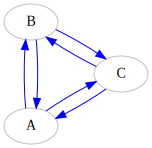

In [14]:
P_graph